# Playing with Healthcare data from online dataset

-Beth Stankevich (09/2015)

Data sources:
https://data.healthcare.gov/dataset/QHP-Landscape-SHOP-Market-Medical/ss3e-3mza
https://data.healthcare.gov/dataset/QHP-Landscape-Individual-Market-Medical/b8in-sz6k

### Looking at number of programs available in a county & price range
(Round 1) 

In [19]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Load data into a DataFrame 
Poke around in data to understand what's going on and whether cleaning is necessary.



In [20]:
individual_plans = pd.read_csv('QHP_Landscape_Individual_Market_Medical.csv', low_memory=False)

In [21]:
individual_plans.head(5)

,State,County,Metal Level,Issuer Name,Plan ID - Standard Component,Plan Marketing Name,Plan Type,Rating Area,Child Only Offering,Source,...,Drug Maximum Out of Pocket - Family - 94 percent,Primary Care Physician - 94 percent,Specialist - 94 percent,Emergency Room - 94 percent,Inpatient Facility - 94 percent,Inpatient Physician - 94 percent,Generic Drugs - 94 percent,Preferred Brand Drugs - 94 percent,Non-preferred Brand Drugs - 94 percent,Specialty Drugs - 94 percent
0,AK,ALEUTIANS EAST,Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK0570001,"Blue Cross Blue Shield Plus 5250 HSA High, a M...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,ALEUTIANS EAST,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK0570002,"Blue Cross Blue Shield Plus 2500 HSA High, a M...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,Included in Medical,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible
2,AK,ALEUTIANS EAST,Gold,Premera Blue Cross Blue Shield of Alaska,38344AK0600002,"Blue Cross Blue Shield Select 1000, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,ALEUTIANS EAST,Gold,Premera Blue Cross Blue Shield of Alaska,38344AK0600003,"Blue Cross Blue Shield Select 1500, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,ALEUTIANS EAST,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK0600004,"Blue Cross Blue Shield Select 2000, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,Included in Medical,$20,$20,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,$10,$30,$50,20% Coinsurance after deductible


In [22]:
individual_plans.dtypes

State                                                      object
County                                                     object
Metal Level                                                object
Issuer Name                                                object
Plan ID - Standard Component                               object
Plan Marketing Name                                        object
Plan Type                                                  object
Rating Area                                                object
Child Only Offering                                        object
Source                                                     object
Customer Service Phone Number Local                        object
Customer Service Phone Number Toll Free                    object
Customer Service Phone Number TTY                          object
Network URL                                                object
Plan Brochure URL                                          object
Summary of

### Create counts of unique Health Care plans by county

Spent some time thinking about how to do this before remembering groupby

In [27]:
len(np.unique(individual_plans['County']))
unique_county = np.unique(individual_plans['County'])

In [28]:
len(np.unique(individual_plans["Plan ID - Standard Component"]))
unique_plans = np.unique(individual_plans["Plan ID - Standard Component"])

In [31]:
unique_county[0:5]

array(['ABBEVILLE', 'ACADIA', 'ACCOMACK', 'ADAIR', 'ADAMS'], dtype=object)

In [32]:
unique_plans[0:5]

array(['10191NJ0030001', '10191NJ0030002', '10191NJ0040001',
       '10191NJ0040002', '10191NJ0050001'], dtype=object)

In [63]:
individual_plans.groupby("Plan ID - Standard Component").head()

,State,County,Metal Level,Issuer Name,Plan ID - Standard Component,Plan Marketing Name,Plan Type,Rating Area,Child Only Offering,Source,...,Drug Maximum Out of Pocket - Family - 94 percent,Primary Care Physician - 94 percent,Specialist - 94 percent,Emergency Room - 94 percent,Inpatient Facility - 94 percent,Inpatient Physician - 94 percent,Generic Drugs - 94 percent,Preferred Brand Drugs - 94 percent,Non-preferred Brand Drugs - 94 percent,Specialty Drugs - 94 percent
0,AK,ALEUTIANS EAST,Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK0570001,"Blue Cross Blue Shield Plus 5250 HSA High, a M...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,ALEUTIANS EAST,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK0570002,"Blue Cross Blue Shield Plus 2500 HSA High, a M...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,Included in Medical,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible
2,AK,ALEUTIANS EAST,Gold,Premera Blue Cross Blue Shield of Alaska,38344AK0600002,"Blue Cross Blue Shield Select 1000, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,ALEUTIANS EAST,Gold,Premera Blue Cross Blue Shield of Alaska,38344AK0600003,"Blue Cross Blue Shield Select 1500, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,ALEUTIANS EAST,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK0600004,"Blue Cross Blue Shield Select 2000, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,Included in Medical,$20,$20,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,$10,$30,$50,20% Coinsurance after deductible
5,AK,ALEUTIANS EAST,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK0600006,"Blue Cross Blue Shield Select 3000, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,Included in Medical,$20,$20,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,$10,$30,$50,20% Coinsurance after deductible
6,AK,ALEUTIANS EAST,Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK0600007,"Blue Cross Blue Shield Select 5500, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AK,ALEUTIANS EAST,Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK0600008,"Blue Cross Blue Shield Select 6350, a Multi-St...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AK,ALEUTIANS EAST,Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK0610001,"Blue Cross Blue Shield Select 5250 HSA, a Mult...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AK,ALEUTIANS EAST,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK0610002,"Blue Cross Blue Shield Select 2500 HSA, a Mult...",PPO,Rating Area 2,Allows Adult and Child-Only,OPM,...,Included in Medical,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible


In [52]:
individual_plans.head(5)[['County',"Plan ID - Standard Component"]]

,County,Plan ID - Standard Component
0,ALEUTIANS EAST,38344AK0570001
1,ALEUTIANS EAST,38344AK0570002
2,ALEUTIANS EAST,38344AK0600002
3,ALEUTIANS EAST,38344AK0600003
4,ALEUTIANS EAST,38344AK0600004


In [57]:
# realized my initial method for using groupby lumped counties that had that same name from different states 
# thus, giving me an inflated plan count
individual_plans[individual_plans['County'] == 'ADAMS']

,State,County,Metal Level,Issuer Name,Plan ID - Standard Component,Plan Marketing Name,Plan Type,Rating Area,Child Only Offering,Source,...,Drug Maximum Out of Pocket - Family - 94 percent,Primary Care Physician - 94 percent,Specialist - 94 percent,Emergency Room - 94 percent,Inpatient Facility - 94 percent,Inpatient Physician - 94 percent,Generic Drugs - 94 percent,Preferred Brand Drugs - 94 percent,Non-preferred Brand Drugs - 94 percent,Specialty Drugs - 94 percent
12984,IA,ADAMS,Gold,Coventry Health Care of Iowa Inc.,18973IA0250001,Gold $5 Copay POS Plan,POS,Rating Area 4,Allows Adult and Child-Only,SERFF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12985,IA,ADAMS,Silver,Coventry Health Care of Iowa Inc.,18973IA0250002,Silver $10 Copay POS Plan,POS,Rating Area 4,Allows Adult and Child-Only,SERFF,...,Included in Medical,No Charge,$25,$100,10%,10%,$3,$30,$55,20%
12986,IA,ADAMS,Bronze,Coventry Health Care of Iowa Inc.,18973IA0250003,Bronze $10 Copay POS Plan,POS,Rating Area 4,Allows Adult and Child-Only,SERFF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12987,IA,ADAMS,Catastrophic,Coventry Health Care of Iowa Inc.,18973IA0250004,Catastrophic 100% POS Plan,POS,Rating Area 4,Allows Adult and Child-Only,SERFF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12988,IA,ADAMS,Bronze,Coventry Health Care of Iowa Inc.,18973IA0250005,Bronze Deductible Only POS HSA Eligible Plan,POS,Rating Area 4,Allows Adult and Child-Only,SERFF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12989,IA,ADAMS,Silver,Coventry Health Care of Iowa Inc.,18973IA0330001,Silver POS IHAWP,POS,Rating Area 4,Allows Adult and Child-Only,SERFF,...,Included in Medical,No Charge,$25,$100,10%,10%,$3,$30,$55,20%
12990,IA,ADAMS,Platinum,CoOportunity Health,71268IA0050001,CoOportunity Premier Platinum,PPO,Rating Area 4,Allows Adult and Child-Only,SERFF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12991,IA,ADAMS,Gold,CoOportunity Health,71268IA0050002,CoOportunity Premier Gold,PPO,Rating Area 4,Allows Adult and Child-Only,SERFF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12992,IA,ADAMS,Gold,CoOportunity Health,71268IA0050003,CoOportunity Premier HSA Gold,PPO,Rating Area 4,Allows Adult and Child-Only,SERFF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12993,IA,ADAMS,Silver,CoOportunity Health,71268IA0050004,CoOportunity Premier Silver,PPO,Rating Area 4,Allows Adult and Child-Only,SERFF,...,Included in Medical,$20,$40,$250 Copay after deductible and 30% Coinsuranc...,30% Coinsurance after deductible,30% Coinsurance after deductible,$10,$40,$80,$150


In [121]:
gb_plans = individual_plans.groupby(['County','State']).count()

In [134]:
gb_plans = gb_plans.reset_index()

In [137]:
gb_plans['State'].unique()

array(['SC', 'LA', 'VA', 'IA', 'MO', 'OK', 'IL', 'IN', 'MS', 'ND', 'NE',
       'OH', 'PA', 'WI', 'FL', 'NC', 'WY', 'MI', 'AK', 'KS', 'TN', 'TX',
       'ME', 'AZ', 'GA', 'AR', 'NJ', 'SD', 'AL', 'WV', 'UT', 'MT', 'NH',
       'DE'], dtype=object)

In [138]:
# checking the spread of the data
gb_plans["Plan ID - Standard Component"].unique()

array([ 27,  33,  28,  30,  20,  39,  22,  51,   6,  25,  34,  55,  18,
        31,  38,  29,  36,  19,  23,  21,  14,  54,  40,  67,  12,  78,
        15,  24,  11,  32,  46,   8,  35,  37,   7,  77,  26,  13,  62,
        41,  63,  53,  48,  17,  61,  65,  47,  50, 109, 136,  99,  45,
        74,  42,  59,  52,  84,  90,  16,  44,  79,  58,  68,  71,  80,
        91, 141,  49,  89,  56, 130,   2,  10,  43,  72,  93, 106,  73,
        88,  97, 101,  66,  87,  69, 119,  60,  57, 107,  82,  95,  98,
       169, 115, 122,  70,  85, 147, 102,  81])

In [139]:
# looking for county with large number of plans 
gb_plans[gb_plans["Plan ID - Standard Component"] == 141]

,County,State,Metal Level,Issuer Name,Plan ID - Standard Component,Plan Marketing Name,Plan Type,Rating Area,Child Only Offering,Source,...,Drug Maximum Out of Pocket - Family - 94 percent,Primary Care Physician - 94 percent,Specialist - 94 percent,Emergency Room - 94 percent,Inpatient Facility - 94 percent,Inpatient Physician - 94 percent,Generic Drugs - 94 percent,Preferred Brand Drugs - 94 percent,Non-preferred Brand Drugs - 94 percent,Specialty Drugs - 94 percent
645,DODGE,WI,141,141,141,141,141,141,141,141,...,52,52,52,52,52,52,52,52,52,52
1635,Miami-Dade,FL,141,141,141,141,141,141,141,141,...,48,48,48,48,48,48,48,48,48,48


In [246]:
gb_plans[gb_plans["Plan ID - Standard Component"] == 169]

,County,State,Metal Level,Issuer Name,Plan ID - Standard Component,Plan Marketing Name,Plan Type,Rating Area,Child Only Offering,Source,...,Drug Maximum Out of Pocket - Family - 94 percent,Primary Care Physician - 94 percent,Specialist - 94 percent,Emergency Room - 94 percent,Inpatient Facility - 94 percent,Inpatient Physician - 94 percent,Generic Drugs - 94 percent,Preferred Brand Drugs - 94 percent,Non-preferred Brand Drugs - 94 percent,Specialty Drugs - 94 percent
2047,SEMINOLE,FL,169,169,169,169,169,169,169,169,...,48,48,48,48,48,48,48,48,48,48


### Plot histogram with the number of healthcare plan options available across counties

-histogram shows number of counties (y axis) that have a given number of total plans available (x axis)

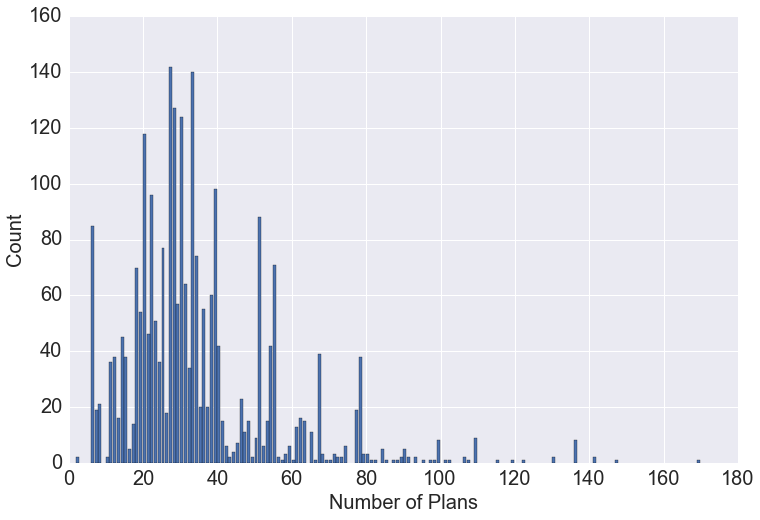

In [257]:
x = gb_plans["Plan ID - Standard Component"].unique()
y = gb_plans["Plan ID - Standard Component"].value_counts()

fig = plt.figure(figsize=(12,8))
plt.bar(x,y)
plt.xlabel('Number of Plans',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.tick_params(axis='both',  labelsize=20)

### Get min and max values for prices in Miami-Dade county (one county with a very large number of options)

In [248]:
miami_dade = individual_plans[(individual_plans['State'] == 'FL') & (individual_plans['County'] == "Miami-Dade")]
md_30cost = miami_dade["Premium Adult Individual Age 30"]

In [245]:
print min(md_30cost) 
print max(md_30cost) 

$118.03
$455.03


### Final used workflow

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

individual_plans = pd.read_csv('QHP_Landscape_Individual_Market_Medical.csv', low_memory=False)

gb_plans = individual_plans.groupby(['County','State']).count()
gb_plans = gb_plans.reset_index()

x = gb_plans["Plan ID - Standard Component"].unique()
y = gb_plans["Plan ID - Standard Component"].value_counts()

fig = plt.figure(figsize=(12,8))
plt.bar(x,y)
plt.xlabel('Number of Plans',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.tick_params(axis='both',  labelsize=20)

miami_dade = individual_plans[(individual_plans['State'] == 'FL') & (individual_plans['County'] == "Miami-Dade")]
md_30cost = miami_dade["Premium Adult Individual Age 30"]
print min(md_30cost) 
print max(md_30cost) 